In [9]:
import pandas as pd
import numpy as np

In [34]:
path = 'C:\\Users\\gamak\\Documents\\Papers\\Stars\\'
tab = pd.read_csv(path+'100brightest_with_SpT.csv')

In [35]:
SPT = pd.read_csv(path+'SPT_Teff.csv')

In [171]:
SPT_III = pd.read_csv(path+'SPT_Teff_III.csv')

In [36]:
T = np.array(SPT['Temperature (K)'])

In [172]:
T_III = np.array(SPT_III['Temperature (K)'])

In [38]:
SPT_Teff=pd.Series([SPT['Spectral Type'][np.abs(T-Te).argmin()] for Te in tab.Teff],name='SPT_Teff')

In [39]:
tab1 = pd.concat([tab,SPT_Teff], axis = 1)

In [52]:
SP = [str(ST).replace('b','') for ST in tab1.SP_TYPE]

In [60]:
Sp_T = [str(ST).replace("\'",'') for ST in SP]

In [91]:
SPT_str = SPT['Spectral Type']

In [139]:
Teff_SPT = pd.Series(name='Teff_SPT', index=tab1.index)

C:\Users\gamak\AppData\Local\Temp/ipykernel_33500/3382983805.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Teff_SPT = pd.Series(name='Teff_SPT', index=tab1.index)


In [140]:
for j in range(len(Sp_T)):
    for i in range(SPT_str.shape[0]):
        if str(SPT_str[i]) in Sp_T[j]:
            Teff_SPT[j] = SPT['Temperature (K)'][i]
            #print(j, SPT['Temperature (K)'][i])
            
        

In [142]:
import matplotlib.pyplot as plt

In [201]:
subgia = [j for j in range(len(Sp_T)) if 'IV' in Sp_T[j]]

In [173]:
III = [j for j in range(len(Sp_T)) if 'III' in Sp_T[j]]

In [176]:
SPT_III['Spectral Type'][np.abs(T_III-tab.Teff[III[0]]).argmin()]

'K2'

In [198]:
for i in range(len(III)):
    tab2.SPT_Teff[III[i]]=SPT_III['Spectral Type'][np.abs(T_III-tab.Teff[III[i]]).argmin()]
    tab2.Teff_SPT[III[i]]=SPT_III['Temperature (K)'][SPT_III['Spectral Type'] == tab2.SPT_Teff[III[i]]]

C:\Users\gamak\AppData\Local\Temp/ipykernel_33500/3315400869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab2.SPT_Teff[III[i]]=SPT_III['Spectral Type'][np.abs(T_III-tab.Teff[III[i]]).argmin()]
C:\Users\gamak\AppData\Local\Temp/ipykernel_33500/3315400869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab2.Teff_SPT[III[i]]=SPT_III['Temperature (K)'][SPT_III['Spectral Type'] == tab2.SPT_Teff[III[i]]]


In [214]:
tab2.SPT_Teff[III] = tab2.SPT_Teff[III]+'III'

C:\Users\gamak\AppData\Local\Temp/ipykernel_33500/3505166803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab2.SPT_Teff[III] = tab2.SPT_Teff[III]+'III'


In [232]:
hot=[19,22,43,53]

In [253]:
tick = range(0,SPT.shape[0],2)

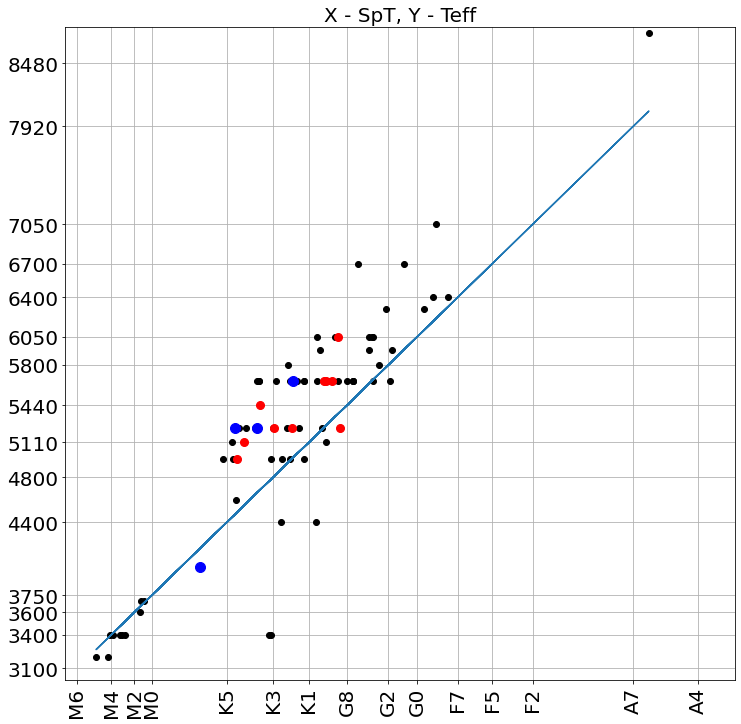

In [267]:
fig = plt.figure(figsize=(12,12))
plt.plot(tab2.Teff, Teff_SPT, 'ko', )
plt.plot(tab2.Teff[subgia], Teff_SPT[subgia], 'ro', markersize = 8)
plt.plot(tab2.Teff[hot], Teff_SPT[hot], 'bo', markersize=10)
plt.title('X - SpT, Y - Teff', size =20)
plt.plot(tab2.Teff,tab1.Teff)
plt.xticks(SPT['Temperature (K)'][tick],SPT['Spectral Type'][tick], rotation = 90, size=20)
plt.yticks(SPT['Temperature (K)'][tick],SPT['Temperature (K)'][tick], size = 20)
plt.xlim(3000,8800)
plt.ylim(3000,8800)
plt.grid(True)
plt.savefig(path+'SpT_GAIA_SIMBAD.jpeg', dpi=300)

In [159]:
tab2 = pd.concat([tab1,Teff_SPT],axis=1)

In [161]:
tab2.SP_TYPE = Sp_T

In [269]:
tab2[['SP_TYPE','SPT_Teff']].to_csv(path+'SP_Types_comp_III.csv', index=None)

In [165]:
tab2.to_csv(path+'100brightest_SIMBAD_SPT.csv', index=None)